In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mujahidashraf/data/refs/heads/main/heart_disease.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [ ]:

print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB
None


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
for column in df.columns:
    total_values = df[column].count()  # Non-null values
    missing_values = df[column].isna().sum()  # Null values

    print(f"Column: {column}")
    print(f"Total values: {total_values}")
    print(f"Missing values: {missing_values}\n")

Column: id
Total values: 920
Missing values: 0

Column: age
Total values: 920
Missing values: 0

Column: sex
Total values: 920
Missing values: 0

Column: dataset
Total values: 920
Missing values: 0

Column: cp
Total values: 920
Missing values: 0

Column: trestbps
Total values: 861
Missing values: 59

Column: chol
Total values: 890
Missing values: 30

Column: fbs
Total values: 830
Missing values: 90

Column: restecg
Total values: 918
Missing values: 2

Column: thalch
Total values: 865
Missing values: 55

Column: exang
Total values: 865
Missing values: 55

Column: oldpeak
Total values: 858
Missing values: 62

Column: slope
Total values: 611
Missing values: 309

Column: ca
Total values: 309
Missing values: 611

Column: thal
Total values: 434
Missing values: 486



In [ ]:
submission_id=df['id']
df=df.drop(columns=['id','ca','thal','slope','dataset'],axis=1)
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='object']
categorical_features= [feature for feature in df.columns if df[feature].dtypes =='object']
numerical_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [ ]:
num_imputer = SimpleImputer(strategy='mean')  # For numeric columns (replace NaN with mean)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
le = LabelEncoder()
#df[categorical_features] = le.fit_transform(df[categorical_features])

df = pd.get_dummies(df, columns=categorical_features)
print(len(df))
df.head()

920


,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True
0,63.0,145.0,233.0,150.0,2.3,False,True,False,False,False,True,False,True,True,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,False,True,True,False,False,False,True,False,True,False,False,False,True
2,67.0,120.0,229.0,129.0,2.6,False,True,True,False,False,False,True,False,True,False,False,False,True
3,37.0,130.0,250.0,187.0,3.5,False,True,False,False,True,False,True,False,False,True,False,True,False
4,41.0,130.0,204.0,172.0,1.4,True,False,False,True,False,False,True,False,True,False,False,True,False


In [ ]:
X = df.values
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

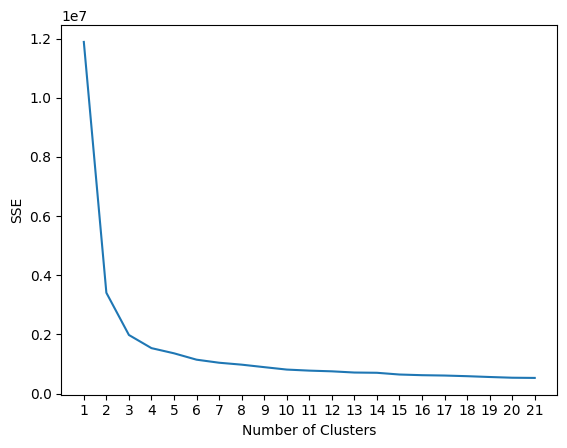

In [ ]:
sse = []
for k in range(1, 22):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 22), sse)
plt.xticks(range(1, 22))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

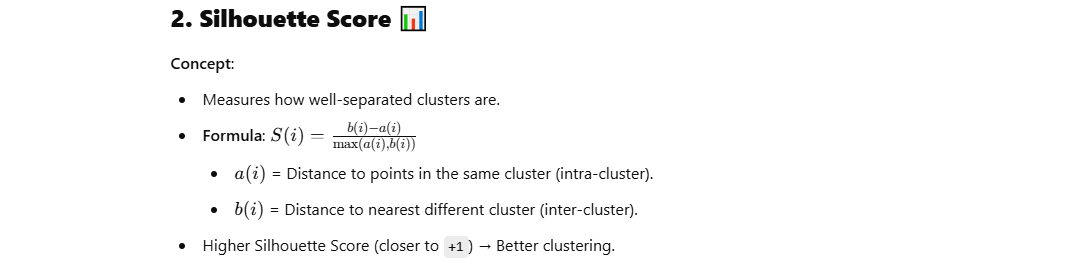

In [ ]:
for n_clusters in range(2, 22):
    kmeans =  KMeans(n_clusters = n_clusters)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Cluster = {n_clusters}, Silhouette Score = {silhouette_avg}  ")

Cluster = 2, Silhouette Score = 0.7031397716139889  
Cluster = 3, Silhouette Score = 0.47704130327925315  
Cluster = 4, Silhouette Score = 0.4292757947240269  
Cluster = 5, Silhouette Score = 0.33470405183161756  
Cluster = 6, Silhouette Score = 0.3529732667664539  
Cluster = 7, Silhouette Score = 0.34476384027549434  
Cluster = 8, Silhouette Score = 0.3501065053199403  
Cluster = 9, Silhouette Score = 0.31999331883121923  
Cluster = 10, Silhouette Score = 0.31834008563883576  
Cluster = 11, Silhouette Score = 0.25246828665114296  
Cluster = 12, Silhouette Score = 0.23573845069191152  
Cluster = 13, Silhouette Score = 0.23246991446990453  
Cluster = 14, Silhouette Score = 0.23867914319640682  
Cluster = 15, Silhouette Score = 0.22674903778014202  
Cluster = 16, Silhouette Score = 0.22415430418509225  
Cluster = 17, Silhouette Score = 0.22832442927063623  
Cluster = 18, Silhouette Score = 0.22946137766434788  
Cluster = 19, Silhouette Score = 0.2228253784515316  
Cluster = 20, Silhouett

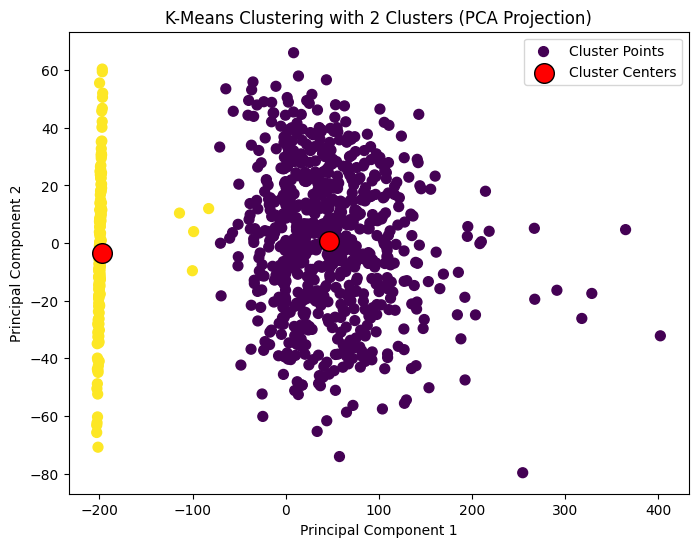

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Use PCA to reduce data dimensions to 2 for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X)
centers_2d = pca.transform(centers)

# Plot the clusters in the 2D PCA space
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=50, cmap='viridis', label="Cluster Points")
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, edgecolors='black',  label="Cluster Centers")

# Add labels, title, and legend
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with 2 Clusters (PCA Projection)")
plt.legend()
plt.show()